In [93]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [262]:
def Target_table(file):
    df = pd.read_csv(file)
    stars = df.iloc[df['Module'].values!=-1]
    stars['zp'] = stars['Kpmag'].values + 2.5*np.log10(stars['PDC'].values)
    
    clip = stars.copy()
    clip = clip.iloc[stars['PDCe'].values/stars['PDC'].values < 0.01]
    #value and error
    chan = np.zeros((84,2))
    for i in range(chan.shape[0]):
        i = i+1
        sources = len(clip['zp'].iloc[(clip['Channel'].values == i)])
        
        if sources >= 10:
            chan[i-1,0] = np.nanmedian(clip['zp'].iloc[(clip['Channel'].values == i)])
            chan[i-1,1] = np.nanstd(clip['zp'].iloc[(clip['Channel'].values == i)])
            if chan[i-1,1] > 0.3:
                chan[i-1,0] = np.nan
                chan[i-1,1] = np.nan
                
        else:
            chan[i-1,0] = np.nan
            chan[i-1,1] = np.nan

    return chan

In [263]:
c1 = Target_table('./target_lists/everest_added/c1_all_stars_ev.csv')
c6 = Target_table('./target_lists/everest_added/c6_all_stars_ev.csv')
c12 = Target_table('./target_lists/everest_added/c12_all_stars_ev.csv')
#c13 = Target_table('./target_lists/everest_added/c13_all_stars_ev.csv')
c14 = Target_table('./target_lists/everest_added/c14_all_stars_ev.csv')
c16 = Target_table('./target_lists/everest_added/c16_all_stars_ev.csv')
c17 = Target_table('./target_lists/everest_added/c17_all_stars_ev.csv')

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


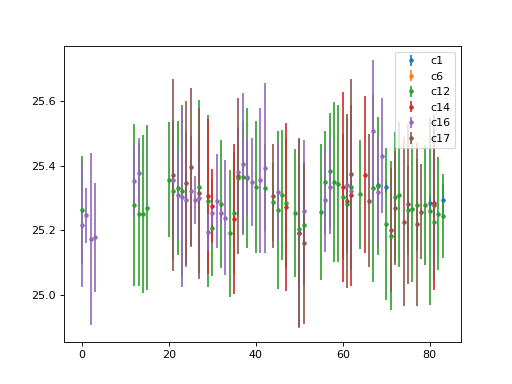

In [264]:
plt.figure()
plt.errorbar(np.arange(0,84),c1[:,0],yerr=c1[:,1],label='c1',fmt='.')
plt.errorbar(np.arange(0,84),c6[:,0],yerr=c6[:,1],label='c6',fmt='.')
plt.errorbar(np.arange(0,84),c12[:,0],yerr=c12[:,1],label='c12',fmt='.')
plt.errorbar(np.arange(0,84),c14[:,0],yerr=c14[:,1],label='c14',fmt='.')
plt.errorbar(np.arange(0,84),c16[:,0],yerr=c16[:,1],label='c16',fmt='.')
plt.errorbar(np.arange(0,84),c17[:,0],yerr=c17[:,1],label='c17',fmt='.')
#plt.plot(c6,label='c6')
#plt.plot(c12,label='c12')
#plt.plot(c14,'.',label='c14')
#plt.plot(c16,label='c16')
#plt.plot(c17,label='c17')
plt.legend()

In [266]:
meanzp =np.zeros(84) * np.nan
stdzp =np.zeros(84) * np.nan
err =np.zeros(84) * np.nan
for i in range(84):
    meanzp[i] = np.nanmean([c1[i,0],c6[i,0],c12[i,0],c14[i,0],c16[i,0],c17[i,0]])
    err[i] = np.nanmean([c1[i,1],c6[i,1],c12[i,1],c14[i,1],c16[i,1],c17[i,1]])
    #stdzp[i] = np.nanstd([c1[i],c6[i],c12[i],c14[i],c16[i],c17[i]])
    

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


<IPython.core.display.Javascript object>


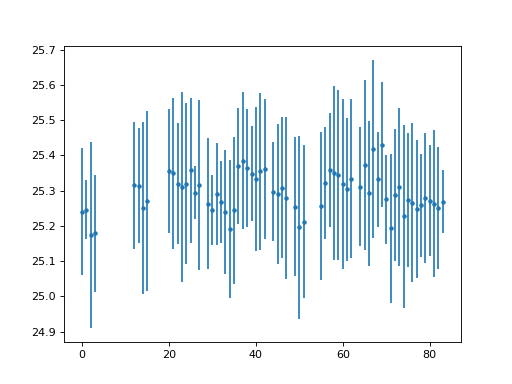

<ErrorbarContainer object of 3 artists>

In [267]:
plt.figure()
plt.errorbar(np.arange(0,84),meanzp,yerr=err,fmt='.')

In [277]:
for i in range(84):
    print(np.round(err[i],1))

0.2
0.1
0.3
0.2
nan
nan
nan
nan
nan
nan
nan
nan
0.2
0.2
0.2
0.3
nan
nan
nan
nan
0.2
0.2
0.2
0.3
0.2
0.2
0.1
0.2
nan
0.2
0.1
0.1
0.1
0.2
0.2
0.2
0.2
0.2
0.2
0.1
0.2
0.2
0.2
nan
0.1
0.2
0.2
0.2
nan
0.2
0.3
0.2
nan
nan
nan
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
nan
0.2
0.2
0.2
0.3
0.1
0.2
0.1
0.2
0.2
0.2
0.3
0.2
0.2
0.2
0.1
0.2
0.2
0.2
0.2
0.1


In [270]:
np.nanmean(meanzp)

25.2942027673614

In [271]:
np.nanmean(err)

0.1913160032562586

<IPython.core.display.Javascript object>


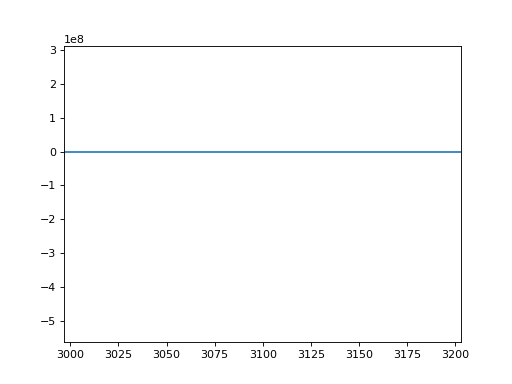

In [64]:
plt.figure()
plt.plot(stars['PDCe']/stars['PDC'])

In [18]:
stars['PDC'].iloc[66]

13181.5146484375

In [278]:
import lightkurve as lk

In [ ]:
lk.KeplerTargetPixelFile

In [119]:
clip = stars.copy()
clip = clip.iloc[stars['PDCe'].values/stars['PDC'].values < 0.05]

chan = np.zeros(84)
for i in range(chan.shape[0]):
    i = i+1
    sources = len(clip['zp'].iloc[(clip['Channel'].values == i)])
    if sources >= 100:
        chan[i-1] = np.nanmedian(clip['zp'].iloc[(clip['Channel'].values == i)])
        

<IPython.core.display.Javascript object>


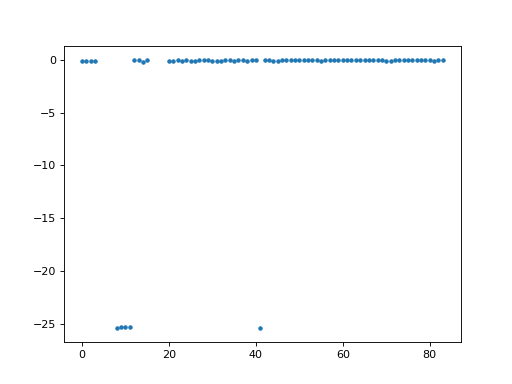

In [120]:
plt.figure()
plt.plot(chan-c1,'.')

<IPython.core.display.Javascript object>


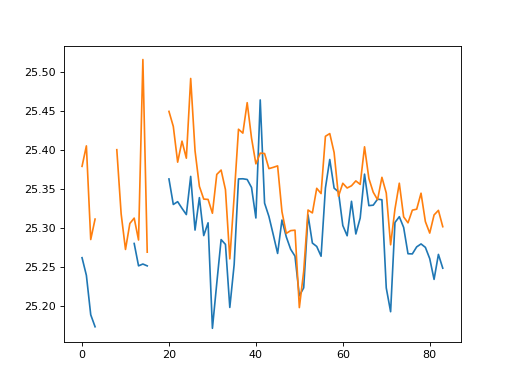

In [116]:
plt.figure()
plt.plot(chan)
plt.plot(c1)

In [88]:
np.nanmedian(chan) -np.nanmedian(c1)

-0.040221488498545455

In [82]:
c1 = chan.copy()

In [89]:
np.nanmedian(chan)

25.306780070334376

In [90]:
np.nanstd(chan)

0.06197393253106987

In [91]:
np.nanstd(c1)

0.055338381237464596

In [92]:
np.nanmedian(c1)

25.347001558832922

In [115]:
chan

array([25.26135685, 25.23873555, 25.18813611, 25.17275521,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, 25.27960772, 25.25090828, 25.25323042,
       25.25085844,         nan,         nan,         nan,         nan,
       25.36235789, 25.32962414, 25.33322522, 25.32467066, 25.31667471,
       25.36565775, 25.29678254, 25.33840793, 25.28971856, 25.30611894,
       25.17075448, 25.22850181, 25.28458767, 25.27841307, 25.19754561,
       25.25243602, 25.36239397, 25.36259439, 25.36169566, 25.35140453,
       25.31228924, 25.46375693, 25.33136237, 25.31425429, 25.29083091,
       25.26680393, 25.30969562, 25.28803929, 25.27216727, 25.26333824,
       25.21245478, 25.22272748, 25.31622799, 25.28012164, 25.27577335,
       25.26322952, 25.35074497, 25.38734076, 25.35058068, 25.34587842,
       25.3026668 , 25.28949689, 25.33370013, 25.29178216, 25.31222175,
       25.36853903, 25.32811502, 25.32875129, 25.3364461 , 25.33

In [280]:
np.long(0)

0